In [1]:
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
from sklearn.neighbors import KNeighborsClassifier
knc= KNeighborsClassifier()
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
from sklearn.linear_model import LogisticRegression
Log=LogisticRegression()
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
g=GaussianNB()
b=BernoulliNB()
!pip install xgboost
from xgboost import XGBClassifier
xgbc=XGBClassifier()



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [3]:
df1=pd.read_csv("train (1).csv")

In [4]:
df2=pd.read_csv("test.csv")

In [5]:
df1.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
412,413,1,1,"Minahan, Miss. Daisy E",female,33.0,1,0,19928,90.000,C78,Q
422,423,0,3,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.875,NaN,S
40,41,0,3,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",female,40.0,1,0,7546,9.475,NaN,S
392,393,0,3,"Gustafsson, Mr. Johan Birger",male,28.0,2,0,3101277,7.925,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.550,NaN,S


In [6]:
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
df1.shape

(891, 12)

In [8]:
df2.shape

(418, 11)

In [9]:
df=df1.append(df2)

In [10]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
212,213,0.0,3,"Perkin, Mr. John Henry",male,22.0,0,0,A/5 21174,7.2500,NaN,S
81,82,1.0,3,"Sheerlinck, Mr. Jan Baptist",male,29.0,0,0,345779,9.5000,NaN,S
454,455,0.0,3,"Peduzzi, Mr. Joseph",male,NaN,0,0,A/5 2817,8.0500,NaN,S
57,949,NaN,3,"Abelseth, Mr. Olaus Jorgensen",male,25.0,0,0,348122,7.6500,F G63,S
643,644,1.0,3,"Foo, Mr. Choong",male,NaN,0,0,1601,56.4958,NaN,S


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [12]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [13]:
df.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [14]:
df.Embarked.value_counts(normalize=True)

S    0.699311
C    0.206580
Q    0.094109
Name: Embarked, dtype: float64

In [15]:
df["Title"]=df["Name"].str.extract(" ([A-Za-z]+)\.",expand=False)

In [16]:
df.Title.value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Ms            2
Mlle          2
Major         2
Countess      1
Capt          1
Don           1
Lady          1
Mme           1
Jonkheer      1
Dona          1
Sir           1
Name: Title, dtype: int64

In [17]:
df.Title=df.Title.replace(["Mlle","Ms"],"Miss")
df.Title=df.Title.replace(["Lady","Mme","Countess","Dona"],"Mrs")
df.Title=df.Title.replace(["Sir","Jonkheer","Countess","Don","Dr","Major","Col","Capt","Rev"],"Mr")

In [18]:
df.Title.value_counts()

Mr        783
Miss      264
Mrs       201
Master     61
Name: Title, dtype: int64

In [19]:
df["Senior"]=df["Age"].map(lambda s:1 if s>70 else 0)

In [20]:
df.groupby("Sex")["Age"].mean()

Sex
female    28.687088
male      30.585228
Name: Age, dtype: float64

In [21]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Senior
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1309.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479,0.004584
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668,0.067573
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000,0.000000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000


In [22]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
Title             0
Senior            0
dtype: int64

In [23]:
df["Age"].fillna(df.groupby("Title")["Age"].transform("median"),inplace=True)
df.groupby("Title")["Age"].transform("median")##title a göre age in median ını alarak 263 tane boşluğu doldurmuş olduk.

0      30.0
1      35.5
2      22.0
3      35.5
4      30.0
       ... 
413    30.0
414    35.5
415    30.0
416    30.0
417     4.0
Name: Age, Length: 1309, dtype: float64

In [24]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
Title             0
Senior            0
dtype: int64

In [25]:
del df["Cabin"]

In [54]:

df["Fare"].fillna(df["Fare"].mean(), inplace=True)

In [55]:
df["Family"]=df["SibSp"]+df["Parch"]+1

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1309 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Fare      1309 non-null   float64
 8   Embarked  1309 non-null   object 
 9   Title     1309 non-null   object 
 10  Senior    1309 non-null   int64  
 11  Family    1309 non-null   int64  
 12  Single    1309 non-null   bool   
 13  Small     1309 non-null   bool   
 14  Medium    1309 non-null   bool   
 15  Large     1309 non-null   bool   
dtypes: bool(4), float64(3), int64(5), object(4)
memory usage: 178.1+ KB


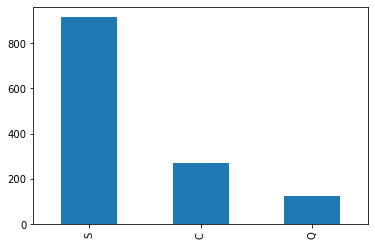

In [58]:
df.Embarked.value_counts(dropna=False).plot(kind="bar");

In [29]:
df["Embarked"]=df["Embarked"].fillna("S")

In [30]:
df["Embarked"].value_counts(normalize=True)

S    0.699771
C    0.206264
Q    0.093965
Name: Embarked, dtype: float64

In [31]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
Title            0
Senior           0
Family           0
dtype: int64

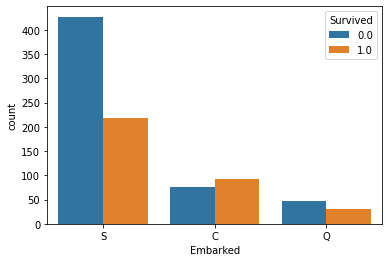

In [32]:
sns.countplot(x="Embarked",hue="Survived",data=df);

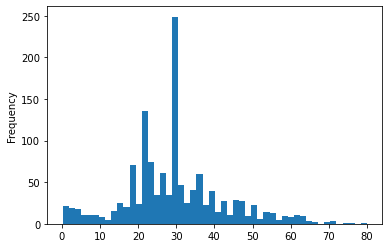

In [33]:
df.Age.plot(kind="hist",bins=50);

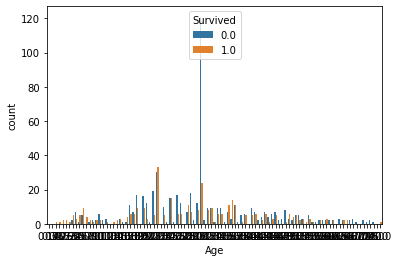

In [34]:
sns.countplot(x="Age",hue="Survived",data=df);

In [35]:
df.Family.value_counts()

1     790
2     235
3     159
4      43
6      25
5      22
7      16
11     11
8       8
Name: Family, dtype: int64

In [59]:
df["Single"]=df.Family<2
df["Small"]=(df.Family>1) & (df.Family<5)
df["Medium"]=(df.Family>4) & (df.Family<7)
df["Large"]=df.Family>6

In [37]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Senior,Family,Single,Small,Medium,Large
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,0,2,False,True,False,False
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,0,2,False,True,False,False
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,0,1,True,False,False,False
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,0,2,False,True,False,False
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,0,1,True,False,False,False


Text(0.5, 1.0, "FAMİLY'S SURVIVING")

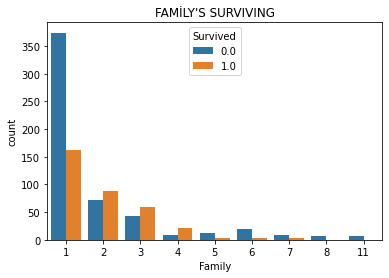

In [38]:
sns.countplot(x="Family",hue="Survived",data=df);
plt.title("FAMİLY'S SURVIVING")

In [60]:
del df["Name"]

In [ ]:
df.drop(["PassengerId","Ticket"],axis=1,inplace=True)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Sex       1309 non-null   object 
 3   Age       1309 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Fare      1309 non-null   float64
 7   Embarked  1309 non-null   object 
 8   Title     1309 non-null   object 
 9   Senior    1309 non-null   int64  
 10  Family    1309 non-null   int64  
 11  Single    1309 non-null   bool   
 12  Small     1309 non-null   bool   
 13  Medium    1309 non-null   bool   
 14  Large     1309 non-null   bool   
dtypes: bool(4), float64(3), int64(5), object(3)
memory usage: 167.8+ KB


In [63]:
df_dummies=pd.get_dummies(df,drop_first=True)

In [64]:
df_dummies.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Senior,Family,Single,Small,Medium,Large,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs
0,0.0,3,22.0,1,0,7.2500,0,2,False,True,False,False,1,0,1,0,1,0
1,1.0,1,38.0,1,0,71.2833,0,2,False,True,False,False,0,0,0,0,0,1
2,1.0,3,26.0,0,0,7.9250,0,1,True,False,False,False,0,0,1,1,0,0
3,1.0,1,35.0,1,0,53.1000,0,2,False,True,False,False,0,0,1,0,0,1
4,0.0,3,35.0,0,0,8.0500,0,1,True,False,False,False,1,0,1,0,1,0


In [65]:
df_train=df_dummies[:891]
df_test=df_dummies[891:]

In [66]:
df_train.shape,df_test.shape

((891, 18), (418, 18))

In [67]:
df_train.head(5)

,Survived,Pclass,Age,SibSp,Parch,Fare,Senior,Family,Single,Small,Medium,Large,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs
0,0.0,3,22.0,1,0,7.2500,0,2,False,True,False,False,1,0,1,0,1,0
1,1.0,1,38.0,1,0,71.2833,0,2,False,True,False,False,0,0,0,0,0,1
2,1.0,3,26.0,0,0,7.9250,0,1,True,False,False,False,0,0,1,1,0,0
3,1.0,1,35.0,1,0,53.1000,0,2,False,True,False,False,0,0,1,0,0,1
4,0.0,3,35.0,0,0,8.0500,0,1,True,False,False,False,1,0,1,0,1,0


In [68]:
del df_train["Survived"]

In [69]:
y=df1["Survived"]

In [70]:
algorithms=[gbc,knc,rfc,dtc,Log,g,b,xgbc]
names=["GradientBoosting","KNeighbors","RandomForestClassifier","DecisionTree","LogisticRegression","GaussianNB","BernoulliNB","XGBClassifier"]

In [74]:
def algo_test(X,y,algorithms=algorithms,names=names):
    #fit the data
    for i in range(len(algorithms)):
        algorithms[i]=algorithms[i].fit(X,y)
        #print metrics
        accuracy=[]
        recall=[]
        f1=[]
        precision=[]
        for i in range(len(algorithms)):
            accuracy.append(accuracy_score(y,algorithms[i].predict(X)))
            recall.append(recall_score(y,algorithms[i].predict(X)))
            f1.append(f1_score(y,algorithms[i].predict(X)))
            precision.append(precision_score(y,algorithms[i].predict(X)))
            
        metrics=pd.DataFrame(columns= ["Accuracy","Precision","Recall","F1"],index=names)
        metrics["Accuracy"]=accuracy
        metrics["Precision"]=precision
        metrics["Recall"]=recall
        metrics["F1"]=f1
        return metrics.sort_values("F1",ascending=False)
        

In [75]:

algo_test(df_train,y)


NotFittedError: This KNeighborsClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
df_test.shape

In [ ]:
df_test.head()

In [ ]:
del df_test["Survived"]

In [ ]:
tahmin=dtc.predict(df_test)

In [ ]:
tahmin

In [ ]:
df_test.head(418)


In [ ]:
sonuc=df2[["PassengerId"]]

In [ ]:
sonuc["Survived"]=tahmin

In [ ]:
sonuc.head()

In [ ]:
sonuc.shape

In [ ]:
sonuc.to_csv("Survived.csv",index=False)